Ваш номер варіанту: 3
Перші 5 значень з стовпця 'APC': [19369 19355 19339 19306 19304]


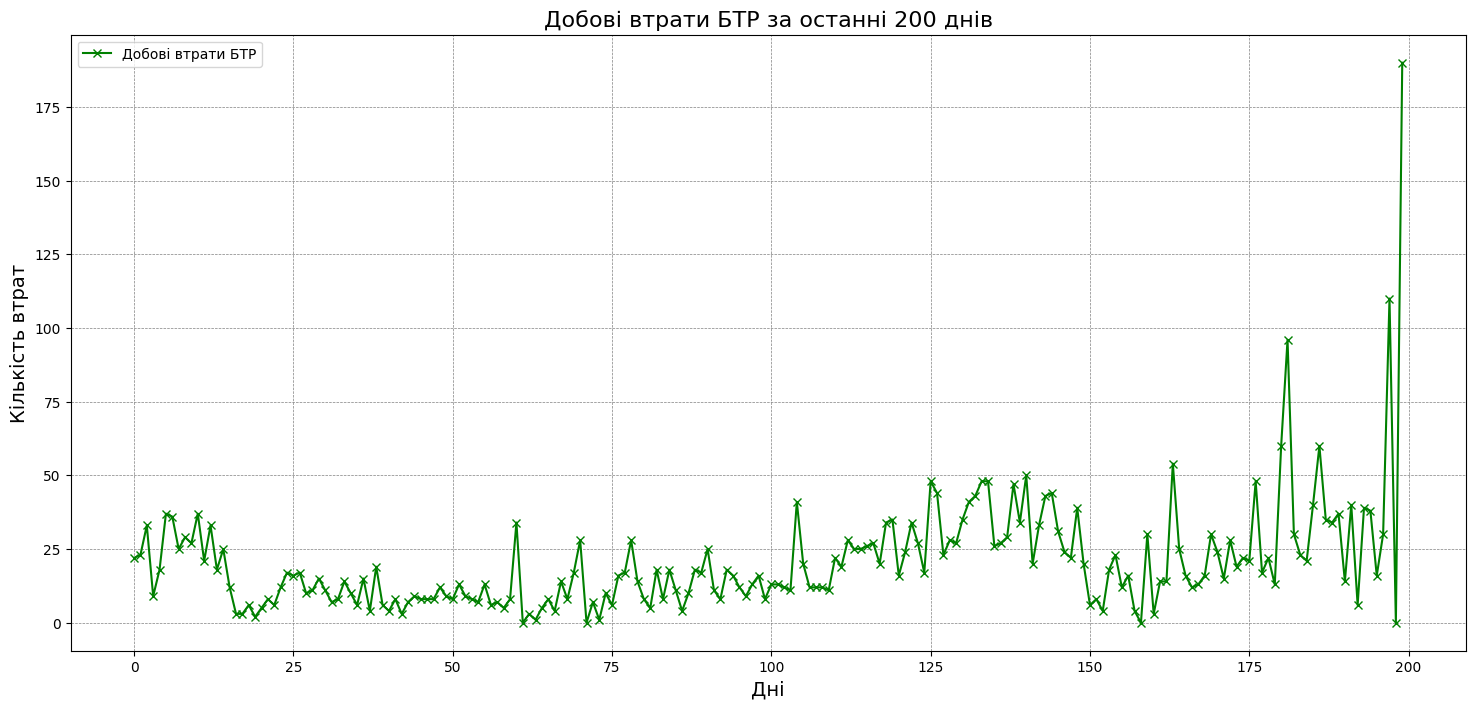

5 найбільших добових втрат: [91, 96, 110, 120, 190]
Загальний збиток за літо 2023 року: 1126
Середнє значення втрат за 100-500 днів: 21.33416458852868
Усі добові втрати: [ 14  16  33 ... 110   0 190]


In [10]:
N = ord("G") % 3 + 1
print("Ваш номер варіанту:", N)
import csv
import numpy as np
import matplotlib.pyplot as plt
import datetime

def read_column(filename, column_name):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        header = next(reader)  
        column_index = header.index(column_name)
        
        data = []
        for row in reader:
            value = row[column_index]
            if value.isdigit():
                data.append(int(value))
            else:
                data.append(0)  
        return np.array(data)

filename = 'russia_losses_equipment.csv'
apc_data = read_column(filename, 'APC')
print("Перші 5 значень з стовпця 'APC':", apc_data[:5])

daily_losses = np.diff(apc_data) * -1  

largest_daily_losses = np.sort(daily_losses)[-5:]

def summer_2023_daily_losses(filename, column_name, date_column='date'):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        header = next(reader)
        date_index = header.index(date_column)
        column_index = header.index(column_name)
        
        dates = []
        cumulative_losses = []

        for row in reader:
            date = datetime.datetime.strptime(row[date_index], '%Y-%m-%d')
            if row[column_index].isdigit():
                dates.append(date)
                cumulative_losses.append(int(row[column_index]))
        
        dates = np.array(dates)
        cumulative_losses = np.array(cumulative_losses)
        
        summer_start = datetime.datetime(2023, 6, 1)
        summer_end = datetime.datetime(2023, 8, 31)
        summer_mask = (dates >= summer_start) & (dates <= summer_end)
        
        summer_daily_losses = np.diff(cumulative_losses[summer_mask]) * -1  
        return np.sum(summer_daily_losses)

summer_2023_total_losses = summer_2023_daily_losses(filename, 'APC')

mean_100_500_days = np.mean(daily_losses[99:500]) if len(daily_losses) > 500 else np.nan

# Побудова графіка втрат за останні 200 днів
plt.figure(figsize=(18, 8), dpi=100)  # Розмір графіка 18x8 дюймів, 100 dpi
plt.plot(daily_losses[-200:], linestyle='-', marker='x', color='g', label='Добові втрати БТР')
plt.title('Добові втрати БТР за останні 200 днів', fontsize=16)
plt.xlabel('Дні', fontsize=14)
plt.ylabel('Кількість втрат', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig('daily_apc_losses_last_200_days_v3.png')  
plt.show()

largest_daily_losses_list = largest_daily_losses.tolist()
summer_2023_total_losses = int(summer_2023_total_losses) 
mean_100_500_days = float(mean_100_500_days)  

print("5 найбільших добових втрат:", largest_daily_losses_list)
print("Загальний збиток за літо 2023 року:", summer_2023_total_losses)
print("Середнє значення втрат за 100-500 днів:", mean_100_500_days)   

print("Усі добові втрати:", daily_losses)

In [8]:
!pip install matplotlib


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.8 MB 12.2 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 12.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 11.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------------ --- 2.4/2.6 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 10.6 MB/s eta 0:00:00
